# 機械学習スクラッチ ロジスティック回帰

参考サイト：<br>
決定領域のプロット方法<br>
https://enjoyworks.jp/tech-blog/3087<br>
ラムダのパラメータ設定基準<br>
https://jp.mathworks.com/help/stats/regularize-logistic-regression.html<br>
ラベルが0, 1以外で入った時の対処法
https://note.nkmk.me/python-pass-usage/<br>
https://python.atelierkobato.com/where/<br>

In [ ]:
import numpy as np

class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    def __init__(self, num_iter=10000, lr=0.0001, bias=False, verbose=False, lmd=0.01):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.lmd = lmd
        self.loss_list = []
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        self.theta = np.random.rand(X.shape[1], 1)
        if self.bias:
            theta_bias = np.ones((1,1))
            self.theta = np.insert(self.theta, 0, theta_bias)
            X = np.insert(X, 0, 1, axis=1)
        
        for i in range(self.iter):
            x = self._linear_hypothis(X)
            y_hat = self.sigmoid(x)
            self.loss = self.target_function(X, y, y_hat)
            self._gradient_descent(X, y, y_hat)
            self.loss_list.append(self.loss)

            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print('{0} / {1} times done | loss value: {2}'.format(i+1, self.iter, self.loss))
                

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        # 問題3
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
        x = self._linear_hypothis(X=X)
        y_hat = self.sigmoid(x)
        for i in range(len(y_hat)):
            if y_hat[i] > 0.5:
                y_hat[i] = 1
            else:
                y_hat[i] = 0
        return y_hat
    
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
        x = self._linear_hypothis(X=X)
        y_hat = self.sigmoid(x)
        
        return y_hat
    
    # 問題1
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-1 * x))

    def _linear_hypothis(self, X):
        return np.dot(X, self.theta)
    
    # 問題2
    def _gradient_descent(self, X, y, y_hat):
        tmp = y_hat - y
        tmp = tmp.reshape(-1, 1) # tmp.shape:(80, 1), X.shape:(80, 5)
        error_times_x = tmp * X 
        met_sum = np.sum(error_times_x, axis=0)
        # バイアス項の処理
        self.theta[0] = self.theta[0] - self.lr * (met_sum[0] / X.shape[0])
        # バイアス項以外の特徴量の処理
        for j in range(1, X.shape[1]):
            self.theta[j] = self.theta[j] - self.lr * (((1 / X.shape[0]) * met_sum[j])\
            + (self.lmd * self.theta[j] / X.shape[0]))
    
    # 問題4
    def target_function(self, X, y, y_hat):
        return (np.sum(- y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)) / X.shape[0])\
                + (self.lmd * np.sum(self.theta**2) / 2 * X.shape[0])

【問題1】仮定関数

In [ ]:
# シグモイド関数、仮定関数の定義
def sigmoid(self, x):
    return 1 / (1 + np.exp(x))

def _linear_hypothis(self, X):
    return np.dot(X, self.theta)

【問題2】最急降下法

In [ ]:
def _gradient_descent(self, X, y):
    x = self._linearhypothis(X)
    pred = self.sigmoid(x)
    tmp = error - y
    tmp = tmp.reshape(-1, 1)
    error_times_x = np.dot(tmp.T, X)
    met_sum = np.sum(error_times_x, axis=0)
#   print(met_sum.shape, self.theta.shape)
    self.theta[0] = met_sum[0] / X.shape[0]
    for j in range(1, X.shape[1]):
        self.theta[j] = self.theta[j] - ((self.lr / X.shape[0]) * met_sum[j])\
        + (self.lmd * self.theta[j] / X.shape[0])

【問題3】推定

上で実装済み

【問題4】目的関数

In [ ]:
def target_function(self, X, y, y_hat):
    return (np.sum(- y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)) / m)\
            + (self.lmd * np.sum(self.theta**2) / 2 * X.shape[0])

【問題5】学習と推定

In [28]:
import numpy as np

class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    def __init__(self, num_iter=10000, lr=0.0001, bias=False, verbose=False, lmd=0.01):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.lmd = lmd
        self.loss_list = []
        self.val_loss_list = []
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if list(set(np.unique(y)) - set([0, 1])) == []:
            self.base_label = None
            pass
        
        else:
            self.base_label = np.unique(y)
            np.place(y, y == self.base_label[0], 0)
            np.place(y, y == self.base_label[1], 1)
        
        self.theta = np.random.rand(X.shape[1], 1)
        if self.bias:
            theta_bias = np.ones((1,1))
            self.theta = np.insert(self.theta, 0, theta_bias)
            X = np.insert(X, 0, 1, axis=1)
        
        for i in range(self.iter):
            x = self._linear_hypothis(X)
            y_hat = self.sigmoid(x)
            self.loss = self.target_function(X, y, y_hat)
            self._gradient_descent(X, y, y_hat)
            self.loss_list.append(self.loss)

            if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                print('{0} / {1} times done | loss value: {2}'.format(i+1, self.iter, self.loss))
                
        if type(y_val) == bool:
            if list(set(np.unique(y_val)) - set([0, 1])) == []:
                self.val_base_label = None
                pass
        
            else:
                self.val_base_label = np.unique(y_val)
                np.place(y_val, y_val == self.val_base_label[0], 0)
                np.place(y_val, y_val == self.val_base_label[1], 1)
                
            self.val_theta = np.random.rand(X_val.shape[1], 1)
            if self.bias:
                theta_bias = np.ones((1,1))
                self.theta = np.insert(self.val_theta, 0, theta_bias)
                X_val = np.insert(X_val, 0, 1, axis=1)
                
            for i in range(self.iter):
                x = self._linear_hypothis(X_val)
                val_y_hat = self.sigmoid(x)
                self.val_loss = self.target_function(X_val, y_val, val_y_hat)
                self._gradient_descent(X_val, y_val, val_y_hat)
                self.val_loss_list.append(self.val_loss)

                if self.verbose:
                    #verboseをTrueにした際は学習過程を出力
                    print('{0} / {1} times done | loss value: {2}'.format(i+1, self.iter, self.val_loss))
                    
        else:
            pass
                

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        # 問題3
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
        x = self._linear_hypothis(X=X)
        y_hat = self.sigmoid(x)
#         print(y_hat)
        for i in range(len(y_hat)):
            if y_hat[i] > 0.5:
                y_hat[i] = 1
            elif y_hat[i] <= 0.5:
                y_hat[i] = 0
        
        if self.base_label.all() == None:
            pass
        else:
            y_hat = np.where(y_hat * 1 == 0, self.base_label[0], self.base_label[1])
        return y_hat
    
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
        x = self._linear_hypothis(X=X)
        y_hat = self.sigmoid(x)
        
        return y_hat
    
    # 問題1
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-1 * x))

    def _linear_hypothis(self, X):
        return np.dot(X, self.theta)
    
    # 問題2
    def _gradient_descent(self, X, y, y_hat):
        tmp = y_hat - y
        tmp = tmp.reshape(-1, 1) # tmp.shape:(80, 1), X.shape:(80, 5)
        error_times_x = tmp * X 
        met_sum = np.sum(error_times_x, axis=0)
        # バイアス項の処理
        self.theta[0] = self.theta[0] - self.lr * (met_sum[0] / X.shape[0])
        # バイアス項以外の特徴量の処理
        for j in range(1, X.shape[1]):
            self.theta[j] = self.theta[j] - self.lr * (((1 / X.shape[0]) * met_sum[j])\
            + (self.lmd * self.theta[j] / X.shape[0]))
    
    # 問題4
    def target_function(self, X, y, y_hat):
        return (np.sum(- y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)) / X.shape[0])\
                + (self.lmd * np.sum(self.theta**2) / 2 * X.shape[0])

In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics

iris = load_iris()
iris_data = iris.data[50:, :]
iris_target = iris.target[50:]

In [30]:
iris_data.shape

(100, 4)

In [31]:
iris_target.shape

(100,)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_target, test_size=0.2)

In [33]:
SLR = ScratchLogisticRegression(bias=True, verbose=True)
# SLR.fit(X_train, y_train, X_test, y_test)
SLR.fit(X_train, y_train)
pred = SLR.predict(X_test)
pred_proba = SLR.predict_proba(X_test)
print('予測ラベル: \n', pred)
print('予測確率: \n', pred_proba)

1 / 10000 times done | loss value: 3.024425191022257
2 / 10000 times done | loss value: 3.0224960476602982
3 / 10000 times done | loss value: 3.0205672196365883
4 / 10000 times done | loss value: 3.018638707528309
5 / 10000 times done | loss value: 3.0167105119144852
6 / 10000 times done | loss value: 3.0147826333759844
7 / 10000 times done | loss value: 3.012855072495527
8 / 10000 times done | loss value: 3.010927829857687
9 / 10000 times done | loss value: 3.0090009060489047
10 / 10000 times done | loss value: 3.0070743016574824
11 / 10000 times done | loss value: 3.005148017273592
12 / 10000 times done | loss value: 3.0032220534892877
13 / 10000 times done | loss value: 3.0012964108985063
14 / 10000 times done | loss value: 2.999371090097064
15 / 10000 times done | loss value: 2.9974460916826757
16 / 10000 times done | loss value: 2.9955214162549573
17 / 10000 times done | loss value: 2.993597064415417
18 / 10000 times done | loss value: 2.991673036767483
19 / 10000 times done | los

877 / 10000 times done | loss value: 1.5834865801408173
878 / 10000 times done | loss value: 1.5823453829955558
879 / 10000 times done | loss value: 1.5812058856122377
880 / 10000 times done | loss value: 1.5800680891346954
881 / 10000 times done | loss value: 1.5789319946972586
882 / 10000 times done | loss value: 1.5777976034247234
883 / 10000 times done | loss value: 1.5766649164323199
884 / 10000 times done | loss value: 1.5755339348256783
885 / 10000 times done | loss value: 1.5744046597007997
886 / 10000 times done | loss value: 1.5732770921440216
887 / 10000 times done | loss value: 1.5721512332319874
888 / 10000 times done | loss value: 1.571027084031615
889 / 10000 times done | loss value: 1.5699046456000665
890 / 10000 times done | loss value: 1.5687839189847153
891 / 10000 times done | loss value: 1.5676649052231162
892 / 10000 times done | loss value: 1.566547605342976
893 / 10000 times done | loss value: 1.5654320203621208
894 / 10000 times done | loss value: 1.56431815128

1557 / 10000 times done | loss value: 1.171477151067764
1558 / 10000 times done | loss value: 1.171272250817661
1559 / 10000 times done | loss value: 1.1710680217532203
1560 / 10000 times done | loss value: 1.1708644618897792
1561 / 10000 times done | loss value: 1.170661569246699
1562 / 10000 times done | loss value: 1.170459341847368
1563 / 10000 times done | loss value: 1.1702577777192058
1564 / 10000 times done | loss value: 1.1700568748936684
1565 / 10000 times done | loss value: 1.1698566314062508
1566 / 10000 times done | loss value: 1.1696570452964925
1567 / 10000 times done | loss value: 1.1694581146079797
1568 / 10000 times done | loss value: 1.1692598373883505
1569 / 10000 times done | loss value: 1.1690622116892968
1570 / 10000 times done | loss value: 1.16886523556657
1571 / 10000 times done | loss value: 1.168668907079983
1572 / 10000 times done | loss value: 1.1684732242934128
1573 / 10000 times done | loss value: 1.1682781852748056
1574 / 10000 times done | loss value: 

2186 / 10000 times done | loss value: 1.1175573446201512
2187 / 10000 times done | loss value: 1.1175313030850607
2188 / 10000 times done | loss value: 1.1175053379469504
2189 / 10000 times done | loss value: 1.1174794489239375
2190 / 10000 times done | loss value: 1.1174536357351603
2191 / 10000 times done | loss value: 1.1174278981007735
2192 / 10000 times done | loss value: 1.1174022357419466
2193 / 10000 times done | loss value: 1.1173766483808587
2194 / 10000 times done | loss value: 1.1173511357406953
2195 / 10000 times done | loss value: 1.1173256975456465
2196 / 10000 times done | loss value: 1.1173003335209009
2197 / 10000 times done | loss value: 1.117275043392644
2198 / 10000 times done | loss value: 1.1172498268880549
2199 / 10000 times done | loss value: 1.1172246837353008
2200 / 10000 times done | loss value: 1.1171996136635367
2201 / 10000 times done | loss value: 1.1171746164028993
2202 / 10000 times done | loss value: 1.117149691684505
2203 / 10000 times done | loss va

2970 / 10000 times done | loss value: 1.108049879758155
2971 / 10000 times done | loss value: 1.1080433704540429
2972 / 10000 times done | loss value: 1.1080368655016688
2973 / 10000 times done | loss value: 1.1080303648861007
2974 / 10000 times done | loss value: 1.1080238685924628
2975 / 10000 times done | loss value: 1.1080173766059354
2976 / 10000 times done | loss value: 1.1080108889117544
2977 / 10000 times done | loss value: 1.1080044054952118
2978 / 10000 times done | loss value: 1.107997926341656
2979 / 10000 times done | loss value: 1.1079914514364895
2980 / 10000 times done | loss value: 1.107984980765171
2981 / 10000 times done | loss value: 1.1079785143132135
2982 / 10000 times done | loss value: 1.1079720520661853
2983 / 10000 times done | loss value: 1.1079655940097084
2984 / 10000 times done | loss value: 1.1079591401294608
2985 / 10000 times done | loss value: 1.107952690411173
2986 / 10000 times done | loss value: 1.10794624484063
2987 / 10000 times done | loss value:

3379 / 10000 times done | loss value: 1.1056307579344087
3380 / 10000 times done | loss value: 1.1056252356886582
3381 / 10000 times done | loss value: 1.105619714682199
3382 / 10000 times done | loss value: 1.1056141949118488
3383 / 10000 times done | loss value: 1.1056086763744355
3384 / 10000 times done | loss value: 1.1056031590668
3385 / 10000 times done | loss value: 1.1055976429857948
3386 / 10000 times done | loss value: 1.1055921281282841
3387 / 10000 times done | loss value: 1.1055866144911435
3388 / 10000 times done | loss value: 1.1055811020712618
3389 / 10000 times done | loss value: 1.1055755908655374
3390 / 10000 times done | loss value: 1.1055700808708817
3391 / 10000 times done | loss value: 1.1055645720842173
3392 / 10000 times done | loss value: 1.105559064502479
3393 / 10000 times done | loss value: 1.1055535581226121
3394 / 10000 times done | loss value: 1.1055480529415738
3395 / 10000 times done | loss value: 1.1055425489563326
3396 / 10000 times done | loss value

3971 / 10000 times done | loss value: 1.1025099941965444
3972 / 10000 times done | loss value: 1.1025049044194435
3973 / 10000 times done | loss value: 1.1024998151213257
3974 / 10000 times done | loss value: 1.1024947263018354
3975 / 10000 times done | loss value: 1.1024896379606173
3976 / 10000 times done | loss value: 1.1024845500973175
3977 / 10000 times done | loss value: 1.1024794627115846
3978 / 10000 times done | loss value: 1.1024743758030666
3979 / 10000 times done | loss value: 1.1024692893714145
3980 / 10000 times done | loss value: 1.1024642034162797
3981 / 10000 times done | loss value: 1.1024591179373142
3982 / 10000 times done | loss value: 1.1024540329341725
3983 / 10000 times done | loss value: 1.1024489484065096
3984 / 10000 times done | loss value: 1.1024438643539822
3985 / 10000 times done | loss value: 1.1024387807762477
3986 / 10000 times done | loss value: 1.102433697672965
3987 / 10000 times done | loss value: 1.1024286150437943
3988 / 10000 times done | loss v

4552 / 10000 times done | loss value: 1.0996260887802225
4553 / 10000 times done | loss value: 1.099621243534454
4554 / 10000 times done | loss value: 1.0996163986788696
4555 / 10000 times done | loss value: 1.0996115542134195
4556 / 10000 times done | loss value: 1.0996067101380527
4557 / 10000 times done | loss value: 1.099601866452719
4558 / 10000 times done | loss value: 1.0995970231573684
4559 / 10000 times done | loss value: 1.099592180251951
4560 / 10000 times done | loss value: 1.0995873377364167
4561 / 10000 times done | loss value: 1.0995824956107159
4562 / 10000 times done | loss value: 1.0995776538747988
4563 / 10000 times done | loss value: 1.0995728125286164
4564 / 10000 times done | loss value: 1.0995679715721192
4565 / 10000 times done | loss value: 1.0995631310052585
4566 / 10000 times done | loss value: 1.099558290827985
4567 / 10000 times done | loss value: 1.0995534510402496
4568 / 10000 times done | loss value: 1.0995486116420043
4569 / 10000 times done | loss valu

5159 / 10000 times done | loss value: 1.0967554948630127
5160 / 10000 times done | loss value: 1.0967508807055777
5161 / 10000 times done | loss value: 1.0967462669229433
5162 / 10000 times done | loss value: 1.0967416535150967
5163 / 10000 times done | loss value: 1.0967370404820256
5164 / 10000 times done | loss value: 1.096732427823718
5165 / 10000 times done | loss value: 1.0967278155401607
5166 / 10000 times done | loss value: 1.0967232036313423
5167 / 10000 times done | loss value: 1.0967185920972498
5168 / 10000 times done | loss value: 1.0967139809378712
5169 / 10000 times done | loss value: 1.0967093701531936
5170 / 10000 times done | loss value: 1.0967047597432054
5171 / 10000 times done | loss value: 1.0967001497078939
5172 / 10000 times done | loss value: 1.096695540047247
5173 / 10000 times done | loss value: 1.0966909307612525
5174 / 10000 times done | loss value: 1.096686321849898
5175 / 10000 times done | loss value: 1.0966817133131717
5176 / 10000 times done | loss val

5757 / 10000 times done | loss value: 1.0940627627281378
5758 / 10000 times done | loss value: 1.094058370931068
5759 / 10000 times done | loss value: 1.094053979503365
5760 / 10000 times done | loss value: 1.0940495884450219
5761 / 10000 times done | loss value: 1.0940451977560308
5762 / 10000 times done | loss value: 1.0940408074363854
5763 / 10000 times done | loss value: 1.0940364174860777
5764 / 10000 times done | loss value: 1.094032027905101
5765 / 10000 times done | loss value: 1.094027638693448
5766 / 10000 times done | loss value: 1.0940232498511118
5767 / 10000 times done | loss value: 1.0940188613780846
5768 / 10000 times done | loss value: 1.0940144732743597
5769 / 10000 times done | loss value: 1.09401008553993
5770 / 10000 times done | loss value: 1.0940056981747879
5771 / 10000 times done | loss value: 1.0940013111789266
5772 / 10000 times done | loss value: 1.093996924552339
5773 / 10000 times done | loss value: 1.093992538295018
5774 / 10000 times done | loss value: 1

6570 / 10000 times done | loss value: 1.0906135518353233
6571 / 10000 times done | loss value: 1.0906094581512606
6572 / 10000 times done | loss value: 1.0906053648313412
6573 / 10000 times done | loss value: 1.0906012718755593
6574 / 10000 times done | loss value: 1.0905971792839086
6575 / 10000 times done | loss value: 1.0905930870563831
6576 / 10000 times done | loss value: 1.0905889951929768
6577 / 10000 times done | loss value: 1.0905849036936839
6578 / 10000 times done | loss value: 1.0905808125584981
6579 / 10000 times done | loss value: 1.0905767217874138
6580 / 10000 times done | loss value: 1.0905726313804245
6581 / 10000 times done | loss value: 1.0905685413375246
6582 / 10000 times done | loss value: 1.0905644516587076
6583 / 10000 times done | loss value: 1.0905603623439684
6584 / 10000 times done | loss value: 1.0905562733933003
6585 / 10000 times done | loss value: 1.0905521848066972
6586 / 10000 times done | loss value: 1.0905480965841536
6587 / 10000 times done | loss 

7327 / 10000 times done | loss value: 1.0876184044936306
7328 / 10000 times done | loss value: 1.0876145847767384
7329 / 10000 times done | loss value: 1.0876107654195493
7330 / 10000 times done | loss value: 1.0876069464220566
7331 / 10000 times done | loss value: 1.087603127784255
7332 / 10000 times done | loss value: 1.0875993095061394
7333 / 10000 times done | loss value: 1.0875954915877029
7334 / 10000 times done | loss value: 1.0875916740289402
7335 / 10000 times done | loss value: 1.0875878568298456
7336 / 10000 times done | loss value: 1.0875840399904133
7337 / 10000 times done | loss value: 1.0875802235106375
7338 / 10000 times done | loss value: 1.0875764073905128
7339 / 10000 times done | loss value: 1.0875725916300327
7340 / 10000 times done | loss value: 1.087568776229192
7341 / 10000 times done | loss value: 1.0875649611879845
7342 / 10000 times done | loss value: 1.0875611465064048
7343 / 10000 times done | loss value: 1.0875573321844467
7344 / 10000 times done | loss va

7855 / 10000 times done | loss value: 1.0856514983720953
7856 / 10000 times done | loss value: 1.0856478677787738
7857 / 10000 times done | loss value: 1.0856442375421274
7858 / 10000 times done | loss value: 1.0856406076621499
7859 / 10000 times done | loss value: 1.085636978138836
7860 / 10000 times done | loss value: 1.0856333489721797
7861 / 10000 times done | loss value: 1.0856297201621754
7862 / 10000 times done | loss value: 1.0856260917088174
7863 / 10000 times done | loss value: 1.0856224636121001
7864 / 10000 times done | loss value: 1.085618835872018
7865 / 10000 times done | loss value: 1.0856152084885649
7866 / 10000 times done | loss value: 1.085611581461735
7867 / 10000 times done | loss value: 1.0856079547915234
7868 / 10000 times done | loss value: 1.0856043284779238
7869 / 10000 times done | loss value: 1.0856007025209304
7870 / 10000 times done | loss value: 1.085597076920538
7871 / 10000 times done | loss value: 1.0855934516767407
7872 / 10000 times done | loss valu

8280 / 10000 times done | loss value: 1.0841405603054832
8281 / 10000 times done | loss value: 1.0841370807864525
8282 / 10000 times done | loss value: 1.084133601621682
8283 / 10000 times done | loss value: 1.0841301228111662
8284 / 10000 times done | loss value: 1.0841266443548987
8285 / 10000 times done | loss value: 1.0841231662528745
8286 / 10000 times done | loss value: 1.084119688505088
8287 / 10000 times done | loss value: 1.0841162111115334
8288 / 10000 times done | loss value: 1.0841127340722052
8289 / 10000 times done | loss value: 1.0841092573870972
8290 / 10000 times done | loss value: 1.0841057810562038
8291 / 10000 times done | loss value: 1.08410230507952
8292 / 10000 times done | loss value: 1.0840988294570395
8293 / 10000 times done | loss value: 1.0840953541887568
8294 / 10000 times done | loss value: 1.0840918792746663
8295 / 10000 times done | loss value: 1.0840884047147628
8296 / 10000 times done | loss value: 1.0840849305090399
8297 / 10000 times done | loss valu

8473 / 10000 times done | loss value: 1.083475570190128
8474 / 10000 times done | loss value: 1.0834721589384964
8475 / 10000 times done | loss value: 1.0834687480400336
8476 / 10000 times done | loss value: 1.0834653374947343
8477 / 10000 times done | loss value: 1.0834619273025923
8478 / 10000 times done | loss value: 1.0834585174636022
8479 / 10000 times done | loss value: 1.0834551079777588
8480 / 10000 times done | loss value: 1.0834516988450558
8481 / 10000 times done | loss value: 1.0834482900654878
8482 / 10000 times done | loss value: 1.0834448816390494
8483 / 10000 times done | loss value: 1.0834414735657345
8484 / 10000 times done | loss value: 1.0834380658455378
8485 / 10000 times done | loss value: 1.0834346584784535
8486 / 10000 times done | loss value: 1.0834312514644762
8487 / 10000 times done | loss value: 1.0834278448035997
8488 / 10000 times done | loss value: 1.083424438495819
8489 / 10000 times done | loss value: 1.083421032541128
8490 / 10000 times done | loss val

8847 / 10000 times done | loss value: 1.0822243471933728
8848 / 10000 times done | loss value: 1.0822210676337707
8849 / 10000 times done | loss value: 1.082217788425231
8850 / 10000 times done | loss value: 1.0822145095677485
8851 / 10000 times done | loss value: 1.0822112310613177
8852 / 10000 times done | loss value: 1.0822079529059325
8853 / 10000 times done | loss value: 1.0822046751015875
8854 / 10000 times done | loss value: 1.0822013976482774
8855 / 10000 times done | loss value: 1.0821981205459963
8856 / 10000 times done | loss value: 1.0821948437947384
8857 / 10000 times done | loss value: 1.0821915673944988
8858 / 10000 times done | loss value: 1.082188291345271
8859 / 10000 times done | loss value: 1.0821850156470498
8860 / 10000 times done | loss value: 1.0821817402998295
8861 / 10000 times done | loss value: 1.0821784653036048
8862 / 10000 times done | loss value: 1.0821751906583694
8863 / 10000 times done | loss value: 1.0821719163641184
8864 / 10000 times done | loss va

9375 / 10000 times done | loss value: 1.0805414455974791
9376 / 10000 times done | loss value: 1.0805383506193276
9377 / 10000 times done | loss value: 1.0805352559892833
9378 / 10000 times done | loss value: 1.080532161707341
9379 / 10000 times done | loss value: 1.0805290677734944
9380 / 10000 times done | loss value: 1.0805259741877384
9381 / 10000 times done | loss value: 1.0805228809500675
9382 / 10000 times done | loss value: 1.0805197880604758
9383 / 10000 times done | loss value: 1.0805166955189578
9384 / 10000 times done | loss value: 1.0805136033255083
9385 / 10000 times done | loss value: 1.080510511480121
9386 / 10000 times done | loss value: 1.080507419982791
9387 / 10000 times done | loss value: 1.0805043288335126
9388 / 10000 times done | loss value: 1.0805012380322796
9389 / 10000 times done | loss value: 1.0804981475790874
9390 / 10000 times done | loss value: 1.0804950574739296
9391 / 10000 times done | loss value: 1.080491967716801
9392 / 10000 times done | loss valu

9679 / 10000 times done | loss value: 1.079616578829285
9680 / 10000 times done | loss value: 1.0796135894191572
9681 / 10000 times done | loss value: 1.079610600355444
9682 / 10000 times done | loss value: 1.0796076116381403
9683 / 10000 times done | loss value: 1.0796046232672398
9684 / 10000 times done | loss value: 1.0796016352427378
9685 / 10000 times done | loss value: 1.0795986475646282
9686 / 10000 times done | loss value: 1.0795956602329053
9687 / 10000 times done | loss value: 1.0795926732475642
9688 / 10000 times done | loss value: 1.079589686608599
9689 / 10000 times done | loss value: 1.0795867003160038
9690 / 10000 times done | loss value: 1.0795837143697735
9691 / 10000 times done | loss value: 1.0795807287699026
9692 / 10000 times done | loss value: 1.0795777435163851
9693 / 10000 times done | loss value: 1.079574758609216
9694 / 10000 times done | loss value: 1.079571774048389
9695 / 10000 times done | loss value: 1.079568789833899
9696 / 10000 times done | loss value:

9974 / 10000 times done | loss value: 1.0787497016063934
9975 / 10000 times done | loss value: 1.0787468141479657
9976 / 10000 times done | loss value: 1.0787439270343167
9977 / 10000 times done | loss value: 1.078741040265441
9978 / 10000 times done | loss value: 1.0787381538413325
9979 / 10000 times done | loss value: 1.0787352677619864
9980 / 10000 times done | loss value: 1.0787323820273969
9981 / 10000 times done | loss value: 1.0787294966375582
9982 / 10000 times done | loss value: 1.078726611592465
9983 / 10000 times done | loss value: 1.078723726892112
9984 / 10000 times done | loss value: 1.0787208425364931
9985 / 10000 times done | loss value: 1.0787179585256033
9986 / 10000 times done | loss value: 1.0787150748594365
9987 / 10000 times done | loss value: 1.0787121915379878
9988 / 10000 times done | loss value: 1.0787093085612516
9989 / 10000 times done | loss value: 1.0787064259292216
9990 / 10000 times done | loss value: 1.0787035436418928
9991 / 10000 times done | loss val

In [34]:
# 各種評価指標
accuracy = metrics.accuracy_score(y_test, pred)
print('正解率: {}%'.format(accuracy*100))

precision = metrics.precision_score(y_test, pred)
print('適合率: {}%'.format(precision*100))

recall = metrics.recall_score(y_test, pred)
print('再現率: {}%'.format(recall*100))

f_value = metrics.f1_score(y_test, pred)
print('F値: {}'.format(f_value))

正解率: 50.0%
適合率: 33.33333333333333%
再現率: 25.0%
F値: 0.28571428571428575


【問題6】学習曲線のプロット

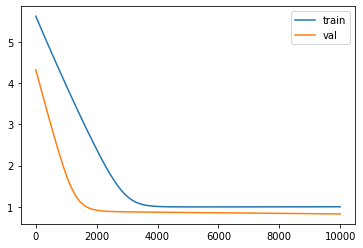

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(10000), SLR.loss_list, label='train')
plt.plot(range(10000), SLR.val_loss_list, label='val')
plt.legend()
plt.show()

In [119]:
SLR.theta

array([ 0.82977166, -0.30949994,  0.00995669,  0.23072657,  0.01314262])

【問題7】決定領域の可視化

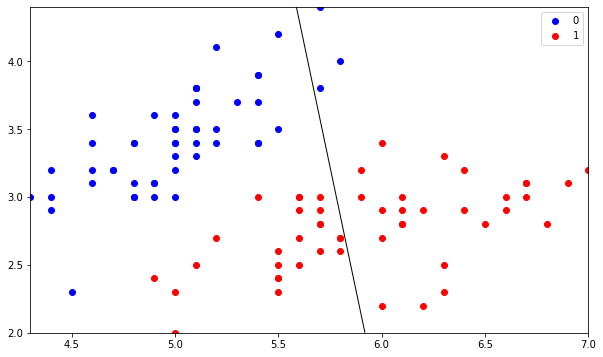

In [482]:
plt.figure(figsize=(10, 6))
plt.scatter(iris_data[iris_target == 0][:, 0], iris_data[iris_target == 0][:, 1], color='b', label='0')
plt.scatter(iris_data[iris_target == 1][:, 0], iris_data[iris_target == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = iris_data[:,0].min(), iris_data[:,0].max(),
x2_min, x2_max = iris_data[:,1].min(), iris_data[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = SLR.predict_proba(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

【問題8】（アドバンス課題）重みの保存

In [15]:
import pickle

# テキストモードで保存
with open('weight.pickle', 'wb') as f:
    pickle.dump(SLR.theta, f)

In [16]:
# ファイル読み込み
with open('weight.pickle', 'rb') as f:
    data = pickle.load(f)
    
print(data)

[ 0.80123074 -0.58216523  0.13093891  0.63569509  0.39109298]


In [17]:
# np.saveで保存
np.save('np_save', SLR.theta)

In [18]:
# np.loadで読み込み
print(np.load('np_save.npy'))
print(type(np.load('np_save.npy')))

[ 0.80123074 -0.58216523  0.13093891  0.63569509  0.39109298]
<class 'numpy.ndarray'>
